# Importation

In [67]:
from sklearn.datasets import load_digits
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# load the dataset and preprocessing

In [68]:
#load digits
digits = load_digits()

#create the variables
images = digits['images']
images= images.reshape(-1, 64)
targets = digits['target']

#print shape 
print(images.shape)
print(targets.shape)

#standardscaler
scaler =StandardScaler()
scaler.fit_transform(images)

#train test split
img_train , img_test, targets_train, targets_test = train_test_split(images, targets, test_size=.2)
print(img_train.shape, img_test.shape)
print(targets.shape, targets_test.shape)

(1797, 64)
(1797,)
(1437, 64) (360, 64)
(1797,) (360,)


# Modeling

In [69]:
#flatten
model = tf.keras.models.Sequential()
#model.add(tf.keras.layers.Flatten(input_shape=[8,8]))

#create the layers
model.add(tf.keras.layers.Dense(256 , input_dim= 64,activation = 'relu'))
model.add(tf.keras.layers.Dense(128, activation= 'relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [70]:
prediction = model(img_train[0:1])
print(prediction , targets_train[0:1])

tf.Tensor(
[[1.4944447e-04 1.2400619e-01 1.3830539e-05 4.3815505e-02 5.9327506e-03
  7.9055041e-01 3.5154894e-02 3.4098564e-05 2.4990202e-04 9.2985036e-05]], shape=(1, 10), dtype=float32) [8]


# the summary of model

In [71]:
print(model.summary())

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_55 (Dense)            (None, 256)               16640     
                                                                 
 dense_56 (Dense)            (None, 128)               32896     
                                                                 
 dense_57 (Dense)            (None, 10)                1290      
                                                                 
Total params: 50,826
Trainable params: 50,826
Non-trainable params: 0
_________________________________________________________________
None


# compile the model

In [72]:
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'sgd',
    metrics = ['accuracy']
)

# fit the model

In [73]:
history = model.fit(img_train, targets_train, epochs=50, validation_split=.2)

Epoch 1/50
36/36 [==============================] - 1s 6ms/step - loss: 1.3429 - accuracy: 0.6945 - val_loss: 0.3050 - val_accuracy: 0.9167
Epoch 2/50
36/36 [==============================] - 0s 4ms/step - loss: 0.2448 - accuracy: 0.9330 - val_loss: 0.2101 - val_accuracy: 0.9514
Epoch 3/50
36/36 [==============================] - 0s 2ms/step - loss: 0.1640 - accuracy: 0.9574 - val_loss: 0.1768 - val_accuracy: 0.9549
Epoch 4/50
36/36 [==============================] - 0s 2ms/step - loss: 0.1293 - accuracy: 0.9652 - val_loss: 0.1396 - val_accuracy: 0.9653
Epoch 5/50
36/36 [==============================] - 0s 3ms/step - loss: 0.0984 - accuracy: 0.9800 - val_loss: 0.1382 - val_accuracy: 0.9618
Epoch 6/50
36/36 [==============================] - 0s 3ms/step - loss: 0.0787 - accuracy: 0.9843 - val_loss: 0.1253 - val_accuracy: 0.9583
Epoch 7/50
36/36 [==============================] - 0s 6ms/step - loss: 0.0637 - accuracy: 0.9887 - val_loss: 0.1175 - val_accuracy: 0.9653
Epoch 8/50
36/36 [==

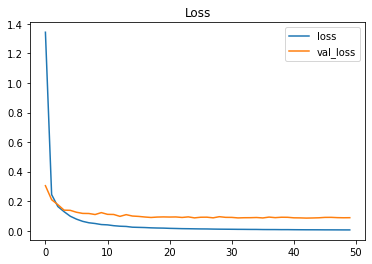

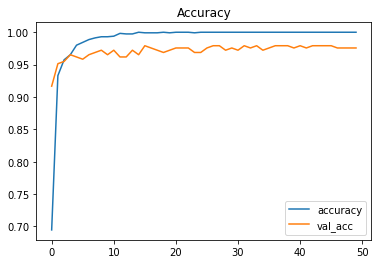

In [74]:
#loss
loss = history.history['loss']
loss_val = history.history['val_loss']

#accuracy
accuracy = history.history['accuracy']
acc_val = history.history['val_accuracy']

#visulalization
plt.figure()
plt.plot(loss, label = 'loss')
plt.plot(loss_val, label = 'val_loss')
plt.title('Loss')
plt.legend()
plt.show()

plt.figure()
plt.plot(accuracy, label = 'accuracy')
plt.plot(acc_val , label = 'val_acc')
plt.title('Accuracy')
plt.legend()
plt.show()

In [75]:
output = model(img_test[0:1])
print('prediction: ',output, '\n targets:',targets_test[0:1])

prediction:  tf.Tensor(
[[4.3378954e-08 2.2972156e-06 9.6741478e-06 1.2551658e-04 5.9500439e-05
  7.5998202e-07 3.2180628e-10 9.9979550e-01 7.1994839e-07 5.9358767e-06]], shape=(1, 10), dtype=float32) 
 targets: [7]
